In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [216]:
df = pd.read_csv('Downloads/Kaggle Dataset/House_Price.csv')

In [217]:
test = pd.read_csv('Downloads/Kaggle Dataset/House_Price_test.csv')

**Training Data**

In [218]:
df.shape

(1460, 81)

In [219]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [220]:
df.columns[df.isnull().sum()>1]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [221]:
Missing_Values = pd.DataFrame(df.isnull().sum(), columns=['Count'])
Missing_Values = Missing_Values[Missing_Values['Count']>1]

In [222]:
Missing_Values.sort_values(by='Count',ascending = False)

,Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


**Null Values Present in above DataFrame indicates that particular features is not present**  For example: **Null value in PoolQc** indicates that **particular house dont have a Pool**

**GarageYrBlt** contains numerical data -> dropping it

In [223]:
df.drop(columns = ['GarageYrBlt'],axis=1,inplace=True)

Filling Null Values of **'Alley','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'** with **'NA'**as categorical Feature

In [224]:
Fill_Lst = [ 'Alley','BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
            'GarageFinish', 'GarageQual', 
            'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [225]:
for i in range(0,len(Fill_Lst)):
    df[f'{Fill_Lst[i]}'].fillna(f'{Fill_Lst[i]}_NA', inplace = True)

In [226]:
df.columns[df.isnull().sum()>1]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea'], dtype='object')

**'MasVnrType', 'MasVnrArea'**

In [227]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [228]:
df['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

Replacing Null Values of both **'MasVnrType' & 'MasVnrArea'** with thier mode

In [229]:
df['MasVnrType'].fillna('None', inplace = True)
df['MasVnrArea'].fillna(0, inplace=True)

**LotFrontage** is highly correlated with **Street**

In [230]:
df.columns[df.isnull().sum()>1]

Index(['LotFrontage'], dtype='object')

<AxesSubplot:xlabel='Street', ylabel='LotFrontage'>

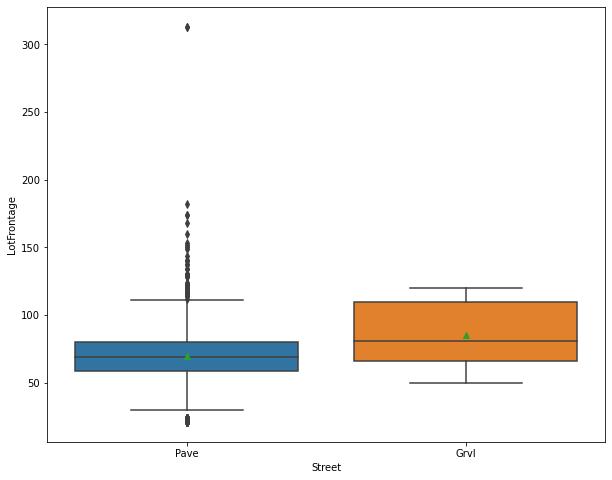

In [231]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['Street'], y=df['LotFrontage'], showmeans = True)


In [232]:
df.groupby(by='Street')['LotFrontage'].mean()

Street
Grvl    85.400000
Pave    69.985786
Name: LotFrontage, dtype: float64

In [233]:
def Lot_Frontage(col):
    Lot_Frontage = col[0]
    Street = col[1]
    if pd.isnull(Lot_Frontage):
        if Street == 'Grvl':
            return 85
        elif Street == 'Pave':
            return 70
        else :
            return 0
    else:
        return Lot_Frontage
        

In [234]:
df['LotFrontage'] = df[['LotFrontage','Street']].apply(Lot_Frontage,axis=1)

In [235]:
df.shape

(1460, 80)

**Test_Data**


In [236]:
test.shape

(1459, 80)

In [237]:
Missing_Values_Test = pd.DataFrame(test.isnull().sum(), columns=['Count'])
Missing_Values_Test = Missing_Values_Test[Missing_Values_Test['Count']>1]

In [238]:
Missing_Values_Test.sort_values(by = 'Count', ascending = False)

,Count
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageQual,78
GarageYrBlt,78
GarageCond,78
GarageFinish,78


In [239]:
test.drop(columns = ['GarageYrBlt'],axis=1,inplace=True)

**Null Values Present in above DataFrame indicates that particular features is not present**  For example: **Null value in PoolQc** indicates that **particular house dont have a Pool**

In [240]:
Fill_Lst_Test = [ 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 
                 'GarageCond','BsmtQual', 'BsmtCond','BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinType2']

In [241]:
for i in range(0,len(Fill_Lst)):
    test[f'{Fill_Lst_Test[i]}'].fillna(f'{Fill_Lst_Test[i]}_NA', inplace = True)

In [242]:
test.columns[test.isnull().sum()>1]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'MasVnrType', 'MasVnrArea',
       'BsmtFullBath', 'BsmtHalfBath', 'Functional'],
      dtype='object')

Replacing Null Values of both **'MasVnrType' & 'MasVnrArea'** with thier mode

In [243]:
test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(0, inplace=True)

In [244]:
test.columns[test.isnull().sum()>1]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'BsmtFullBath', 'BsmtHalfBath',
       'Functional'],
      dtype='object')

**LotFrontage** is highly correlated with **Street**

In [245]:
test['LotFrontage'] = test[['LotFrontage','Street']].apply(Lot_Frontage,axis=1)

In [246]:
test.columns[test.isnull().sum()>1]

Index(['MSZoning', 'Utilities', 'BsmtFullBath', 'BsmtHalfBath', 'Functional'], dtype='object')

Dropping values from **'MSZoning', 'Utilities', 'BsmtFullBath', 'BsmtHalfBath', 'Functional'**

In [247]:
test['MSZoning'].mode()

0    RL
Name: MSZoning, dtype: object

In [248]:
test['MSZoning'].fillna('RL', inplace = True)

In [249]:
test['Utilities'].mode()

0    AllPub
Name: Utilities, dtype: object

In [250]:
test['Utilities'].fillna('AllPub', inplace=True)

In [251]:
test['BsmtFullBath'].mode()

0    0.0
Name: BsmtFullBath, dtype: float64

In [252]:
test['BsmtFullBath'].fillna(0, inplace=True)

In [253]:
test['BsmtHalfBath'].mode()

0    0.0
Name: BsmtHalfBath, dtype: float64

In [254]:
test['BsmtHalfBath'].fillna(0, inplace=True)

In [255]:
test['Functional'].mode()

0    Typ
Name: Functional, dtype: object

In [256]:
test['Functional'].fillna('Typ', inplace=True)

In [257]:
test.columns[test.isnull().sum()>1]

Index([], dtype='object')

In [258]:
test.shape

(1459, 79)

**One Hot Encoding**

In [259]:
DF = pd.concat([df,test], axis = 0)

In [260]:
DF.shape

(2919, 80)

In [261]:
DF['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

Creating List with **Categorical Features**

In [262]:
DF.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [263]:
DF_cat_Lst = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities',
              'LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
              'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
              'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
              'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
              'Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
              'Functional','FireplaceQu','GarageType','GarageFinish',
              'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
              'SaleType','SaleCondition']

In [264]:
len(DF_cat_Lst)

43

**One Hot Encoding**

In [265]:
DF_cat = pd.DataFrame()

In [266]:
for fields in DF_cat_Lst:
    print(fields)
    DF_tmp = pd.get_dummies(DF[fields],drop_first=True,prefix=fields)
    DF.drop([fields],axis=1,inplace=True)
    DF_cat = pd.concat([DF_cat,DF_tmp],axis =1)
    
       
    

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [267]:
DF_cat

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1456,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [268]:
DF

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,NaN
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,NaN
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [269]:
DF_clean = pd.concat([DF,DF_cat],axis =1)

In [270]:
df_train = DF_clean.iloc[:1460,:]
df_test= DF_clean.iloc[1460:,:]

In [271]:
X_train = df_train.drop(['SalePrice','Id'],axis = 1)
y_train = df_train['SalePrice'] 

In [272]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [273]:
X_test = df_test.drop(['SalePrice','Id'],axis = 1)

**XGBoost**

In [274]:
import xgboost

In [275]:
classifier = xgboost.XGBRegressor()

In [276]:
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [279]:
pred_1 = classifier.predict(X_test)

In [182]:
sub_k = pd.read_csv('Downloads/Kaggle Dataset/house_sample_submission.csv')

In [285]:
def sub_file(x):
    temp = pd.DataFrame(x)
    sub = pd.concat([sub_k['Id'],temp],axis =1,ignore_index=True)
    sub.to_csv('Downloads/submission.csv')
    

In [286]:
sub_file(pred_1)

Rank = 1722    Score = 0.14095

**Hyperparameter Tunning**

In [194]:
from sklearn.model_selection import RandomizedSearchCV

In [197]:
params= {
            'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3,0.35],
            'max_depth' : [3,4,6,8,10,12,14,15],
            'min_child_weight' : [1,3,5,7],
            'gamma' : [0,0.1,0.2,0.3,0.4],
            'colsample_bytree' : [0.3,0.4,0.5,0.7]   
        }

In [198]:
random_search = RandomizedSearchCV(classifier, param_distributions=params,n_iter=5,
                                   scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [199]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.3000...
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
          

In [204]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.15,
 'gamma': 0,
 'colsample_bytree': 0.3}

In [201]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [209]:
classifier_tune = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=5,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0)

In [288]:
classifier_tune.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [289]:
pred_2 = classifier_tune.predict(X_test)

In [292]:
sub_file(pred_2)

Rank = 1122 Score = 0.13201

**ANN**